In [ ]:
# Typical Installers: [...]
!pip install --upgrade seaborn
!pip install --upgrade google-cloud
!pip install --upgrade scipy
!pip install --upgrade numpy

#PROPER MATPLOTLIB INSTALLER
# !python -m pip uninstall matplotlib

!pip install matplotlib==3.1.3

#Note: The previous command,  
#!pip install --upgrade matplotlib 
#, !!!DOES NOT WORK ANYMORE!!! ... 
# This function of matplotlib has been deprecated for subsequent package updates

#HOOKING UP THE DRIVE... 
from google.colab import drive, files, auth
drive.mount('/content/drive', force_remount = True)

# MAKING IT PLOT

Forcing compiler to garbage collect unneeded variables...Stand by...



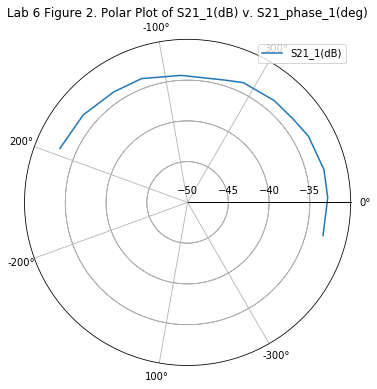

Fig 2 printed...



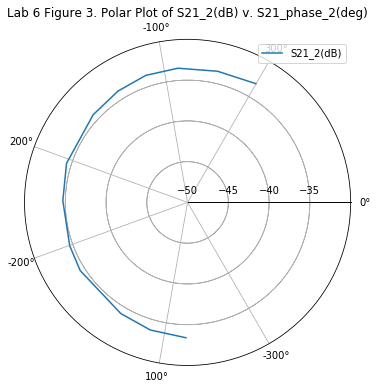

Fig 3 printed...



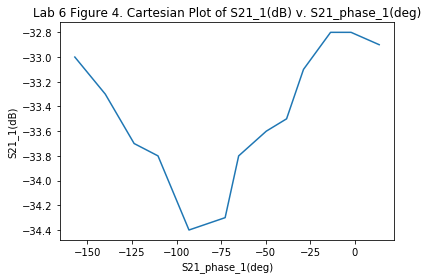

Fig 4 printed...



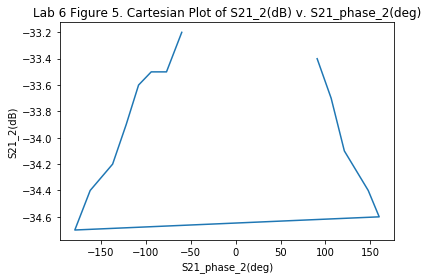

Fig 5 printed...

Garbage dump...
Stand...*urp* back...



In [1]:
#! /usr/bin/env
# -*- coding: utf-8 -*-
import numpy as np, seaborn as sns, pandas as pd, scipy as sci, math
import matplotlib.transforms as mt, gc, sys, matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy 
# from scipy.spatial import ConvexHull
# from matplotlib.collections import PolyCollection
#Use Commented ONLY if Polygonal, Linear Representation on Polar Plot, 
# and use ConvexHull to accumulate data points on a single plot...

# EXECUTION
# Reading in data from Excel: 
def read_excel_sheets(xls_path):
    # Derived from URL: https://www.caktusgroup.com/blog/2019/08/13/import-multiple-excel-sheets-pandas/ 
      # print(f"Loading {xls_path} into pandas\n")
      xl = pd.ExcelFile(xls_path)
      df = pd.DataFrame()
      columns = None
      for idx, name in enumerate(xl.sheet_names):
          # print(f'Reading sheet #{idx + 1}: {name}')
          sheet = xl.parse(name)
          if idx == 0:
          # Save column names from the first sheet to match for append
             columns = sheet.columns
             sheet.columns = columns
          # Assume index of existing data frame when appended
          df = df.append(sheet, ignore_index=True)
      # del (sheet)
      # del (xl)
      # del (columns)
      gc.collect()
      print(f"Forcing compiler to garbage collect unneeded variables...Stand by...\n")
      return df        

ABS_PATHNAME= 'drive/MyDrive/Colab Notebooks/EE517/Lab_Data/Lab_6/Lab 6 CP Antenna Data.xlsx'
df = read_excel_sheets(ABS_PATHNAME) # read in df as the method up top, by PATHNAME
#following scipy example: 

try: 
    # Problem 1: phase_S21_2(rad) v. S21_2(dB) Polar Plot Default 
    phaseS21_1_DegData = df["Phase S21_1(deg)"]
    phaseS21_1_RadData = df["Phase S21_1(rad)"]
    S21_1_dB = df["Mag. S21_1(dB)"] # our plotted values Fig 1,2. Due to the 'dB' unit restriction
    # for polar plot, apparently, this won't plot any unitless values, but trust that 
    # they were available/ present regardless...

    #print(f"phaseS21_1_DegData: {phaseS21_1_DegData}\nphaseS21_1_RadData: {phaseS21_1_RadData}\nS21_1_dB:{S21_1_dB}\n") 
    n = 13 # length of predominant vector length. in excel file 

    #print("Debug 1...\n")
    figP1 = plt.figure(figsize=(6,6))
    axP1 = figP1.add_subplot(111,polar=True)
    axP1.set_theta_zero_location('E')
    axP1.set_theta_direction('clockwise')
    axP1.plot(phaseS21_1_RadData, S21_1_dB, label='S21_1(dB)') 
    axP1.set_xlim(-2*np.pi,2*np.pi)# set in rad's
    axP1.set_ylim(-50,-30) #dB output
    axP1.set_yticks(np.arange(-50,-30,5))
    plt.title("Lab 6 Figure 2. Polar Plot of S21_1(dB) v. S21_phase_1(deg)")
    plt.legend() 
    plt.savefig("Lab6_Figure2_Python.png")
    plt.show()
    print("Fig 2 printed...\n")

    # Problem 2: phase_S21_2(rad) v. S21_2(dB) Polar Plot Default 
    phaseS21_2_DegData = df["Phase S21_2(deg)"]
    phaseS21_2_RadData = df["Phase S21_2(rad)"]
    S21_2_dB = df["Mag. S21_2(dB)"] # our plotted values Fig 1,2. Due to the 'dB' unit restriction
    
    # for polar plot, apparently, this won't plot any unitless values, but trust that 
    # they were available/ present regardless...
    
    #print(f"phaseS21_2_DegData: {phaseS21_2_DegData}\nphaseS21_2_RadData: {phaseS21_2_RadData}\nS21_2_dB:{S21_2_dB}\n") 
    n = 13 # length of predominant vector length. in excel file 

    #print("Debug 2...\n")
    figP2 = plt.figure(figsize=(6,6))
    axP2 = figP2.add_subplot(111,polar=True)
    axP2.set_theta_zero_location('E')
    axP2.set_theta_direction('clockwise')
    axP2.plot(phaseS21_2_RadData, S21_2_dB, label='S21_2(dB)') 
    axP2.set_xlim(-2*np.pi,2*np.pi) # set in rad's
    axP2.set_ylim(-50,-30) #dB output
    axP2.set_yticks(np.arange(-50,-30,5))
    plt.title("Lab 6 Figure 3. Polar Plot of S21_2(dB) v. S21_phase_2(deg)")
    plt.legend() 
    plt.savefig("Lab6_Figure3_Python.png")
    plt.show()
    print("Fig 3 printed...\n")

    #print("Debug 3...\n")
    plt.plot(phaseS21_1_DegData, S21_1_dB)
    plt.xlabel("S21_phase_1(deg)")
    plt.ylabel("S21_1(dB)")
    plt.title("Lab 6 Figure 4. Cartesian Plot of S21_1(dB) v. S21_phase_1(deg)")
    # plt.legend() 
    plt.savefig("Lab6_Figure4_Python.png")
    plt.show()
    print("Fig 4 printed...\n")

    #print("Debug 4...\n")
    plt.plot(phaseS21_2_DegData, S21_2_dB)
    plt.xlabel("S21_phase_2(deg)")
    plt.ylabel("S21_2(dB)")
    plt.title("Lab 6 Figure 5. Cartesian Plot of S21_2(dB) v. S21_phase_2(deg)")
    # plt.legend() 
    plt.savefig("Lab6_Figure5_Python.png")
    plt.show()
    print("Fig 5 printed...\n")

    #Garbage Collection PostRef    
    del (figP1)
    del (figP2)
    del (axP1)
    del (axP2)
    gc.collect()
    print(f"Garbage dump...\nStand...*urp* back...\n") 

except:
  print(f"An error/exception has occurred...\nCheck stack trace, then try again...\n")